In [3]:
import os
from google.colab import files
uploaded = files.upload()
print(os.getcwd())


Saving Weather Data.csv to Weather Data.csv
/content


#Exploratory Data Analysis (EDA)


In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
from scipy import stats


df_weather= pd.read_csv("Weather Data.csv")
df_weather

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df_weather.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
df_weather.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [8]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


#Different weather conditions

In [10]:
weather= df_weather['Weather'].unique()
for weathers in weather:
    print("---->",weathers)

----> Fog
----> Freezing Drizzle,Fog
----> Mostly Cloudy
----> Cloudy
----> Rain
----> Rain Showers
----> Mainly Clear
----> Snow Showers
----> Snow
----> Clear
----> Freezing Rain,Fog
----> Freezing Rain
----> Freezing Drizzle
----> Rain,Snow
----> Moderate Snow
----> Freezing Drizzle,Snow
----> Freezing Rain,Snow Grains
----> Snow,Blowing Snow
----> Freezing Fog
----> Haze
----> Rain,Fog
----> Drizzle,Fog
----> Drizzle
----> Freezing Drizzle,Haze
----> Freezing Rain,Haze
----> Snow,Haze
----> Snow,Fog
----> Snow,Ice Pellets
----> Rain,Haze
----> Thunderstorms,Rain
----> Thunderstorms,Rain Showers
----> Thunderstorms,Heavy Rain Showers
----> Thunderstorms,Rain Showers,Fog
----> Thunderstorms
----> Thunderstorms,Rain,Fog
----> Thunderstorms,Moderate Rain Showers,Fog
----> Rain Showers,Fog
----> Rain Showers,Snow Showers
----> Snow Pellets
----> Rain,Snow,Fog
----> Moderate Rain,Fog
----> Freezing Rain,Ice Pellets,Fog
----> Drizzle,Ice Pellets,Fog
----> Drizzle,Snow
----> Rain,Ice Pelle

In [12]:
df_weather.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [16]:
wind_speed = df_weather['Wind Speed_km/h']
print('Wind Speed_km/h:-',wind_speed)

Wind Speed_km/h:- 0        4
1        4
2        7
3        6
4        7
        ..
8779    30
8780    24
8781    28
8782    28
8783    30
Name: Wind Speed_km/h, Length: 8784, dtype: int64


Wind speed for unique values


In [17]:
wind_speed = df_weather['Wind Speed_km/h'].nunique()
print('wind speed in km/h is :- ', wind_speed)

wind speed in km/h is :-  34


In [19]:
df_weather.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [21]:
df_weather.shape

(8784, 8)

In [22]:
df_weather.index

RangeIndex(start=0, stop=8784, step=1)

In [23]:
column = df_weather.columns
for columns in column:
    print("->",columns)

-> Date/Time
-> Temp_C
-> Dew Point Temp_C
-> Rel Hum_%
-> Wind Speed_km/h
-> Visibility_km
-> Press_kPa
-> Weather


In [25]:
df_weather.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

Number of Unique Values


In [26]:
df_weather.nunique()

Date/Time           8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

Counting the total non-null values


In [27]:
df_weather.count()

Date/Time           8784
Temp_C              8784
Dew Point Temp_C    8784
Rel Hum_%           8784
Wind Speed_km/h     8784
Visibility_km       8784
Press_kPa           8784
Weather             8784
dtype: int64

In [30]:
df_weather['Weather'].value_counts()

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

#All the records where the weather condition is **clear**



In [31]:
df_weather.groupby("Weather").get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


#All the records where the wind speed is **less than 10 km/h**

In [32]:
df_weather[df_weather['Wind Speed_km/h'] <=10]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8771,12/31/2012 11:00,-6.7,-7.9,91,9,9.7,100.93,Snow
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow
8773,12/31/2012 13:00,-4.6,-6.6,86,4,12.9,100.63,Snow
8774,12/31/2012 14:00,-3.4,-5.7,84,6,11.3,100.57,Snow


In [33]:
df_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Temp_C,8784.0,8.798144,11.687883,-23.30,0.10,9.30,18.80,33.00
Dew Point Temp_C,8784.0,2.555294,10.883072,-28.50,-5.90,3.30,11.80,24.40
Rel Hum_%,8784.0,67.431694,16.918881,18.00,56.00,68.00,81.00,100.00
Wind Speed_km/h,8784.0,14.945469,8.688696,0.00,9.00,13.00,20.00,83.00
Visibility_km,8784.0,27.664447,12.622688,0.20,24.10,25.00,25.00,48.30
Press_kPa,8784.0,101.051623,0.844005,97.52,100.56,101.07,101.59,103.65


#Top 5 records where the weather condition is ***Rain***

In [41]:
df_weather[df_weather['Weather'] == 'Rain'].head(5)


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
542,1/23/2012 14:00,2.7,-1.1,76,26,48.3,101.01,Rain
543,1/23/2012 15:00,2.7,-0.9,77,30,24.1,100.86,Rain
545,1/23/2012 17:00,3.1,-0.4,78,28,16.1,100.61,Rain


#Top 10 Records where the Humidity is **less than 70 degree celcius** and Weather condition is **Mostly Cloudy**

In [45]:
df_weather[(df_weather['Rel Hum_%'] <= 70) & (df_weather['Weather'] == 'Mostly Cloudy')].head(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
30,1/2/2012 6:00,2.3,-2.6,70,26,25.0,99.18,Mostly Cloudy
31,1/2/2012 7:00,2.0,-2.9,70,33,25.0,99.14,Mostly Cloudy
32,1/2/2012 8:00,1.9,-3.3,68,39,24.1,99.14,Mostly Cloudy
33,1/2/2012 9:00,1.8,-3.7,67,44,24.1,99.14,Mostly Cloudy
34,1/2/2012 10:00,1.5,-4.1,66,43,24.1,99.18,Mostly Cloudy
35,1/2/2012 11:00,2.2,-3.5,66,30,24.1,99.19,Mostly Cloudy
37,1/2/2012 13:00,1.1,-6.5,57,37,24.1,99.27,Mostly Cloudy


#**Mean Values**

In [47]:
df_weather.groupby('Weather').mean()

<ipython-input-47-a4d003f2e294>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weather.groupby('Weather').mean()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


#**Minimum Values**

In [48]:
df_weather.groupby('Weather').min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,1/11/2012 1:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,1/1/2012 17:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,1/23/2012 21:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",1/23/2012 20:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/17/2012 15:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",12/18/2012 21:00,0.3,-0.1,92,7,2.4,97.79
Fog,1/1/2012 0:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,1/13/2012 10:00,-9.0,-12.2,78,6,4.8,98.44


#**Maximum Values**

In [49]:
df_weather.groupby('Weather').max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather,,,,,,,
Clear,9/9/2012 5:00,32.8,20.4,99,33,48.3,103.63
Cloudy,9/9/2012 23:00,30.5,22.6,99,54,48.3,103.65
Drizzle,9/30/2012 3:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",9/30/2012 2:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",12/17/2012 9:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",12/19/2012 18:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",12/22/2012 3:00,1.1,0.6,98,32,9.7,100.15
Fog,9/22/2012 0:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2/1/2012 5:00,-2.3,-3.3,93,26,12.9,101.02


#**Weather is Clear and Relative Humidity is Greater than 60 or Visibility is above 40**

In [50]:
df_weather[(df_weather['Weather'] == 'Rain') & (df_weather['Rel Hum_%'] > 50) | (df_weather['Visibility_km'] >40)].head(20)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
18,1/1/2012 18:00,3.8,1.0,82,15,12.9,99.74,Rain
19,1/1/2012 19:00,3.1,1.3,88,15,12.9,99.68,Rain
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
111,1/5/2012 15:00,-4.3,-12.0,55,26,48.3,100.52,Mainly Clear
183,1/8/2012 15:00,-6.6,-12.9,61,20,48.3,102.04,Mostly Cloudy
324,1/14/2012 12:00,-17.5,-23.8,58,20,48.3,101.16,Mostly Cloudy


# **Lets Visualise the Whole Data**

# **Temperature Distribution**

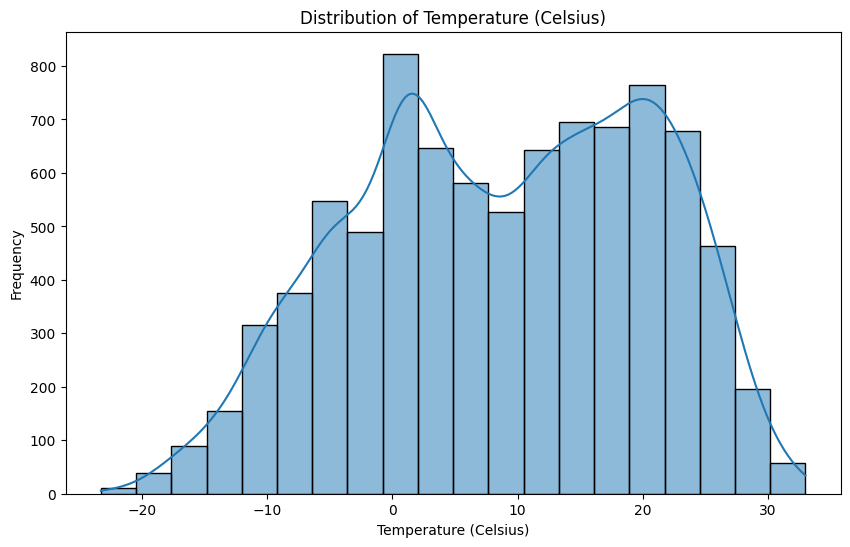

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_weather, x='Temp_C', bins=20, kde=True)
plt.title('Distribution of Temperature (Celsius)')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

#**Humidity Distribution**

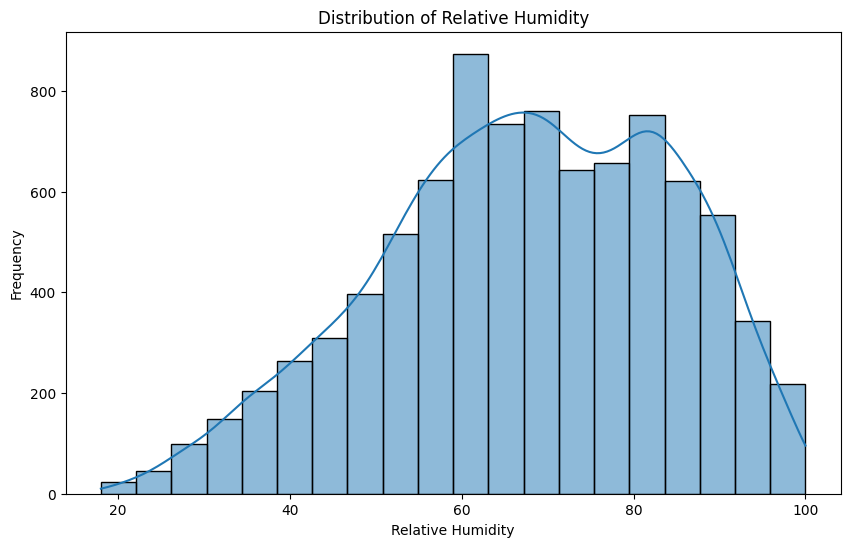

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_weather, x='Rel Hum_%', bins=20, kde=True)
plt.title('Distribution of Relative Humidity')
plt.xlabel('Relative Humidity')
plt.ylabel('Frequency')
plt.show()

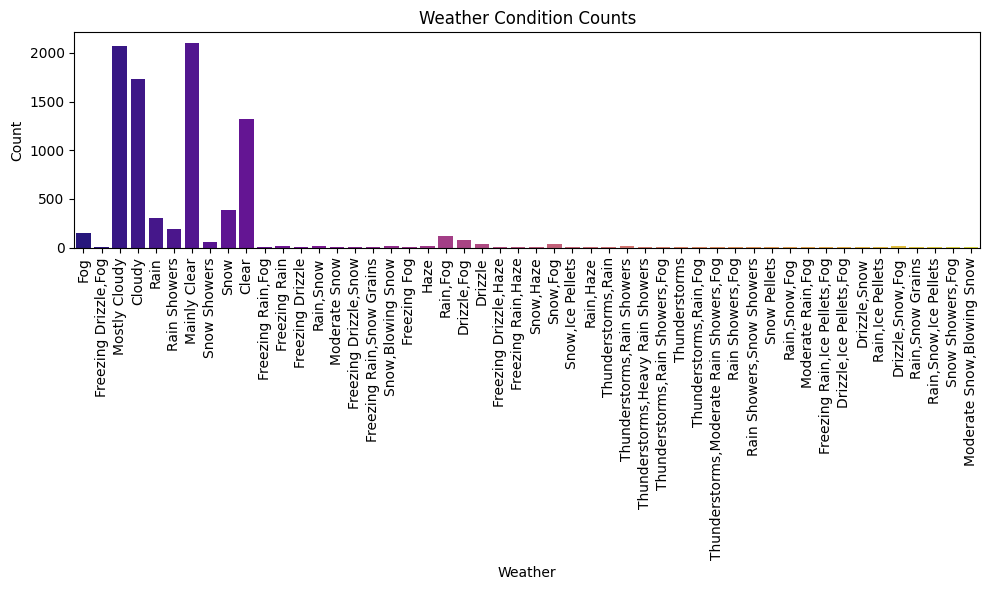

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Weather', data=df_weather, palette='plasma')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.title('Weather Condition Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# **Temperature Variation over the Time**

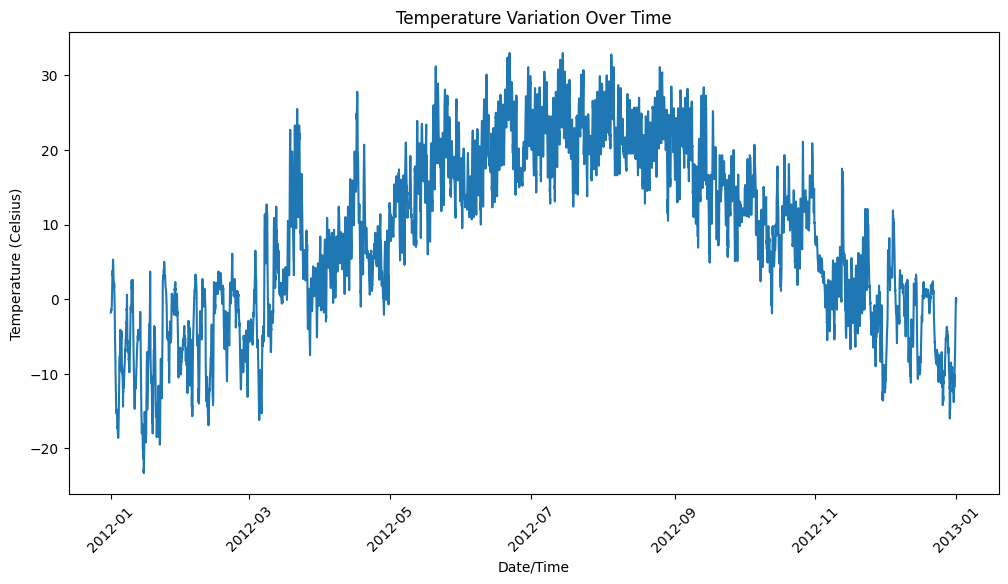

In [73]:
df_weather['Date/Time'] = pd.to_datetime(df_weather['Date/Time'])

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date/Time', y='Temp_C', data=df_weather)
plt.title('Temperature Variation Over Time')
plt.xlabel('Date/Time')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=45)
plt.show()

# **Different Catagories of Winds**

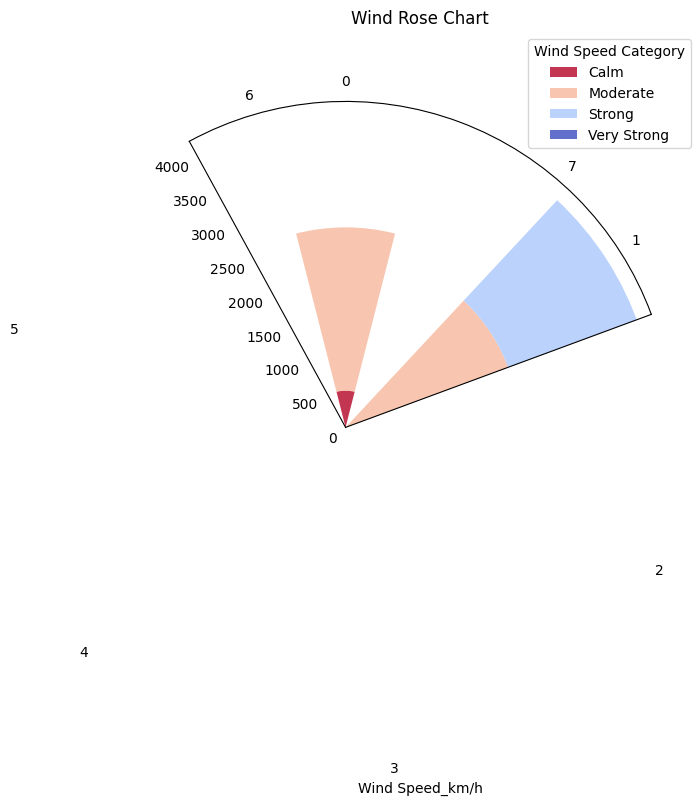

In [80]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

df_weather['Wind Speed Category'] = pd.cut(df_weather['Wind Speed_km/h'], bins=[0, 5, 15, 30, 100], labels=['Calm', 'Moderate', 'Strong', 'Very Strong'])

wind_directions = df_weather['Wind Speed Category'].groupby(pd.cut(df_weather['Wind Speed_km/h'], bins=8, labels=False)).value_counts().unstack(fill_value=0)
wind_directions.plot(kind='bar', stacked=True, ax=ax, colormap='coolwarm_r', alpha=0.8)

plt.title('Wind Rose Chart')
plt.legend(title='Wind Speed Category', bbox_to_anchor=(1.1, 1))
plt.show()